In [1]:
import numpy as np
from tabulate import tabulate
import os
import sys
# print(sys.executable)
from scipy.io import savemat
from scipy.io import loadmat
from scipy.optimize import curve_fit

In [2]:
import pickle
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

In [3]:
n2 = 9 ;
k = 4 ;
remove_X_list = [2,8] ;  remove_Z_list = [3,4] ;
num_instances = 40000 ;

In [4]:
max_num_cycles = 6;

### Run numerical simulation to obtain data 

In [5]:
import subprocess
script = "Classical_simulation_18_4_4.py"
cycles = range(1, max_num_cycles+1)

processes = []
for cycle in cycles:
    p = subprocess.Popen([sys.executable, script, str(cycle)])
    processes.append(p)

# 等待所有进程完成
for p in processes:
    p.wait()

### Perform error correction on numerical data

In [ ]:
import subprocess
script = "Error_correction_classical_simulation_18_4_4.py"
cycles = range(1, max_num_cycles+1)

processes = []
for cycle in cycles:
    p = subprocess.Popen([sys.executable, script, str(cycle)])
    processes.append(p)

# 等待所有进程完成
for p in processes:
    p.wait()

no error correction for logical Z basis:
Logical error over 2 cycles (four logical qubits): 0.5528500000000001
Logical error over 2 cycles (single logical qubit): [0.2883   0.313475 0.218225 0.229625]


error correction for logical Z basis:
Logical error over 2 cycles (four logical qubits): 0.21545000000000003
Logical error over 2 cycles (single logical qubit): [0.11305  0.110125 0.123575 0.11795 ]
no error correction for logical X basis:
Logical error over 2 cycles (four logical qubits): 0.5123500000000001
Logical error over 2 cycles (single logical qubit): [0.277675 0.2799   0.21275  0.282125]


error correction for logical X basis:
Logical error over 2 cycles (four logical qubits): 0.20542499999999997
Logical error over 2 cycles (single logical qubit): [0.1154   0.11885  0.107175 0.10535 ]
no error correction for logical Z basis:
Logical error over 3 cycles (four logical qubits): 0.722375
Logical error over 3 cycles (single logical qubit): [0.3839   0.405875 0.309625 0.321375]


err

In [8]:
set_syndrome_history_X = {}
for cycle in range(1, max_num_cycles+1):
    fname = './Numerical_results/' + 'Logical_X_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    set_syndrome_history_X[f"cycle_{cycle}"] = data['syndrome_history_X']

In [9]:
set_syndrome_history_Z = {}
for cycle in range(1, max_num_cycles+1):
    fname = './Numerical_results/' + 'Logical_Z_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    set_syndrome_history_Z[f"cycle_{cycle}"] = data['syndrome_history_Z']

In [10]:
X_logical_error_probability = [];
X_logical_error_probability_perqubit = [] ;
for cycle in range(1, max_num_cycles+1):
    fname = './Numerical_results/' + 'Logical_X_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    X_logical_error_probability.append( data['logical_error_probability'][0][0] )
    X_logical_error_probability_perqubit.append(data['logical_error_probability_per_qubit'][0])

In [11]:
Z_logical_error_probability = [];
Z_logical_error_probability_perqubit = [] ;
for cycle in range(1, max_num_cycles+1):
    fname = './Numerical_results/' + 'Logical_Z_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    Z_logical_error_probability.append( data['logical_error_probability'][0][0]  )
    Z_logical_error_probability_perqubit.append(data['logical_error_probability_per_qubit'][0])

## Error detection probability

## logical Z state

In [12]:
labels_z = ['Z0', 'Z1', 'Z2', 'Z5', 'Z6', 'Z7', 'Z8']

num_zcheck = len(labels_z) ;

mean_detect_prob_z = np.mean(set_syndrome_history_Z[f"cycle_{max_num_cycles}"], axis=0)

mean_detect_prob_cycle_z = [ np.mean(mean_detect_prob_z[num_zcheck*cycle:num_zcheck*(cycle+1)]) for cycle in range(max_num_cycles+1) ]

for cycle in range(max_num_cycles+1) :
    print( f'The mean probability of error detection in cycle {cycle+1} is:', mean_detect_prob_cycle_z[cycle] )

per_z_detect_prob = [ [ mean_detect_prob_z[i + cycle*num_zcheck ] for cycle in range(max_num_cycles+1) ] for i in range(num_zcheck) ]

The mean probability of error detection in cycle 1 is: 0.130975
The mean probability of error detection in cycle 2 is: 0.26257142857142857
The mean probability of error detection in cycle 3 is: 0.28208928571428576
The mean probability of error detection in cycle 4 is: 0.2805357142857143
The mean probability of error detection in cycle 5 is: 0.2819178571428571
The mean probability of error detection in cycle 6 is: 0.2813357142857143
The mean probability of error detection in cycle 7 is: 0.2940357142857143


## logical X state

In [13]:
labels_x =  ['X0', 'X1', 'X3', 'X4', 'X5', 'X6', 'X7']

num_xcheck = len(labels_x) ;

mean_detect_prob_x = np.mean(set_syndrome_history_X[f"cycle_{max_num_cycles}"], axis=0)

mean_detect_prob_cycle_x = [ np.mean(mean_detect_prob_x[num_xcheck*cycle:num_xcheck*(cycle+1)]) for cycle in range(max_num_cycles+1) ]

for cycle in range(max_num_cycles+1) :
    print( f'The mean probability of error detection in cycle {cycle+1} is:', mean_detect_prob_cycle_x[cycle] )

per_x_detect_prob = [ [ mean_detect_prob_x[i + cycle*num_xcheck ] for cycle in range(max_num_cycles+1) ] for i in range(num_xcheck) ]

The mean probability of error detection in cycle 1 is: 0.16269285714285714
The mean probability of error detection in cycle 2 is: 0.2761321428571429
The mean probability of error detection in cycle 3 is: 0.29627857142857145
The mean probability of error detection in cycle 4 is: 0.2946392857142857
The mean probability of error detection in cycle 5 is: 0.2939214285714286
The mean probability of error detection in cycle 6 is: 0.29406071428571423
The mean probability of error detection in cycle 7 is: 0.27367142857142857


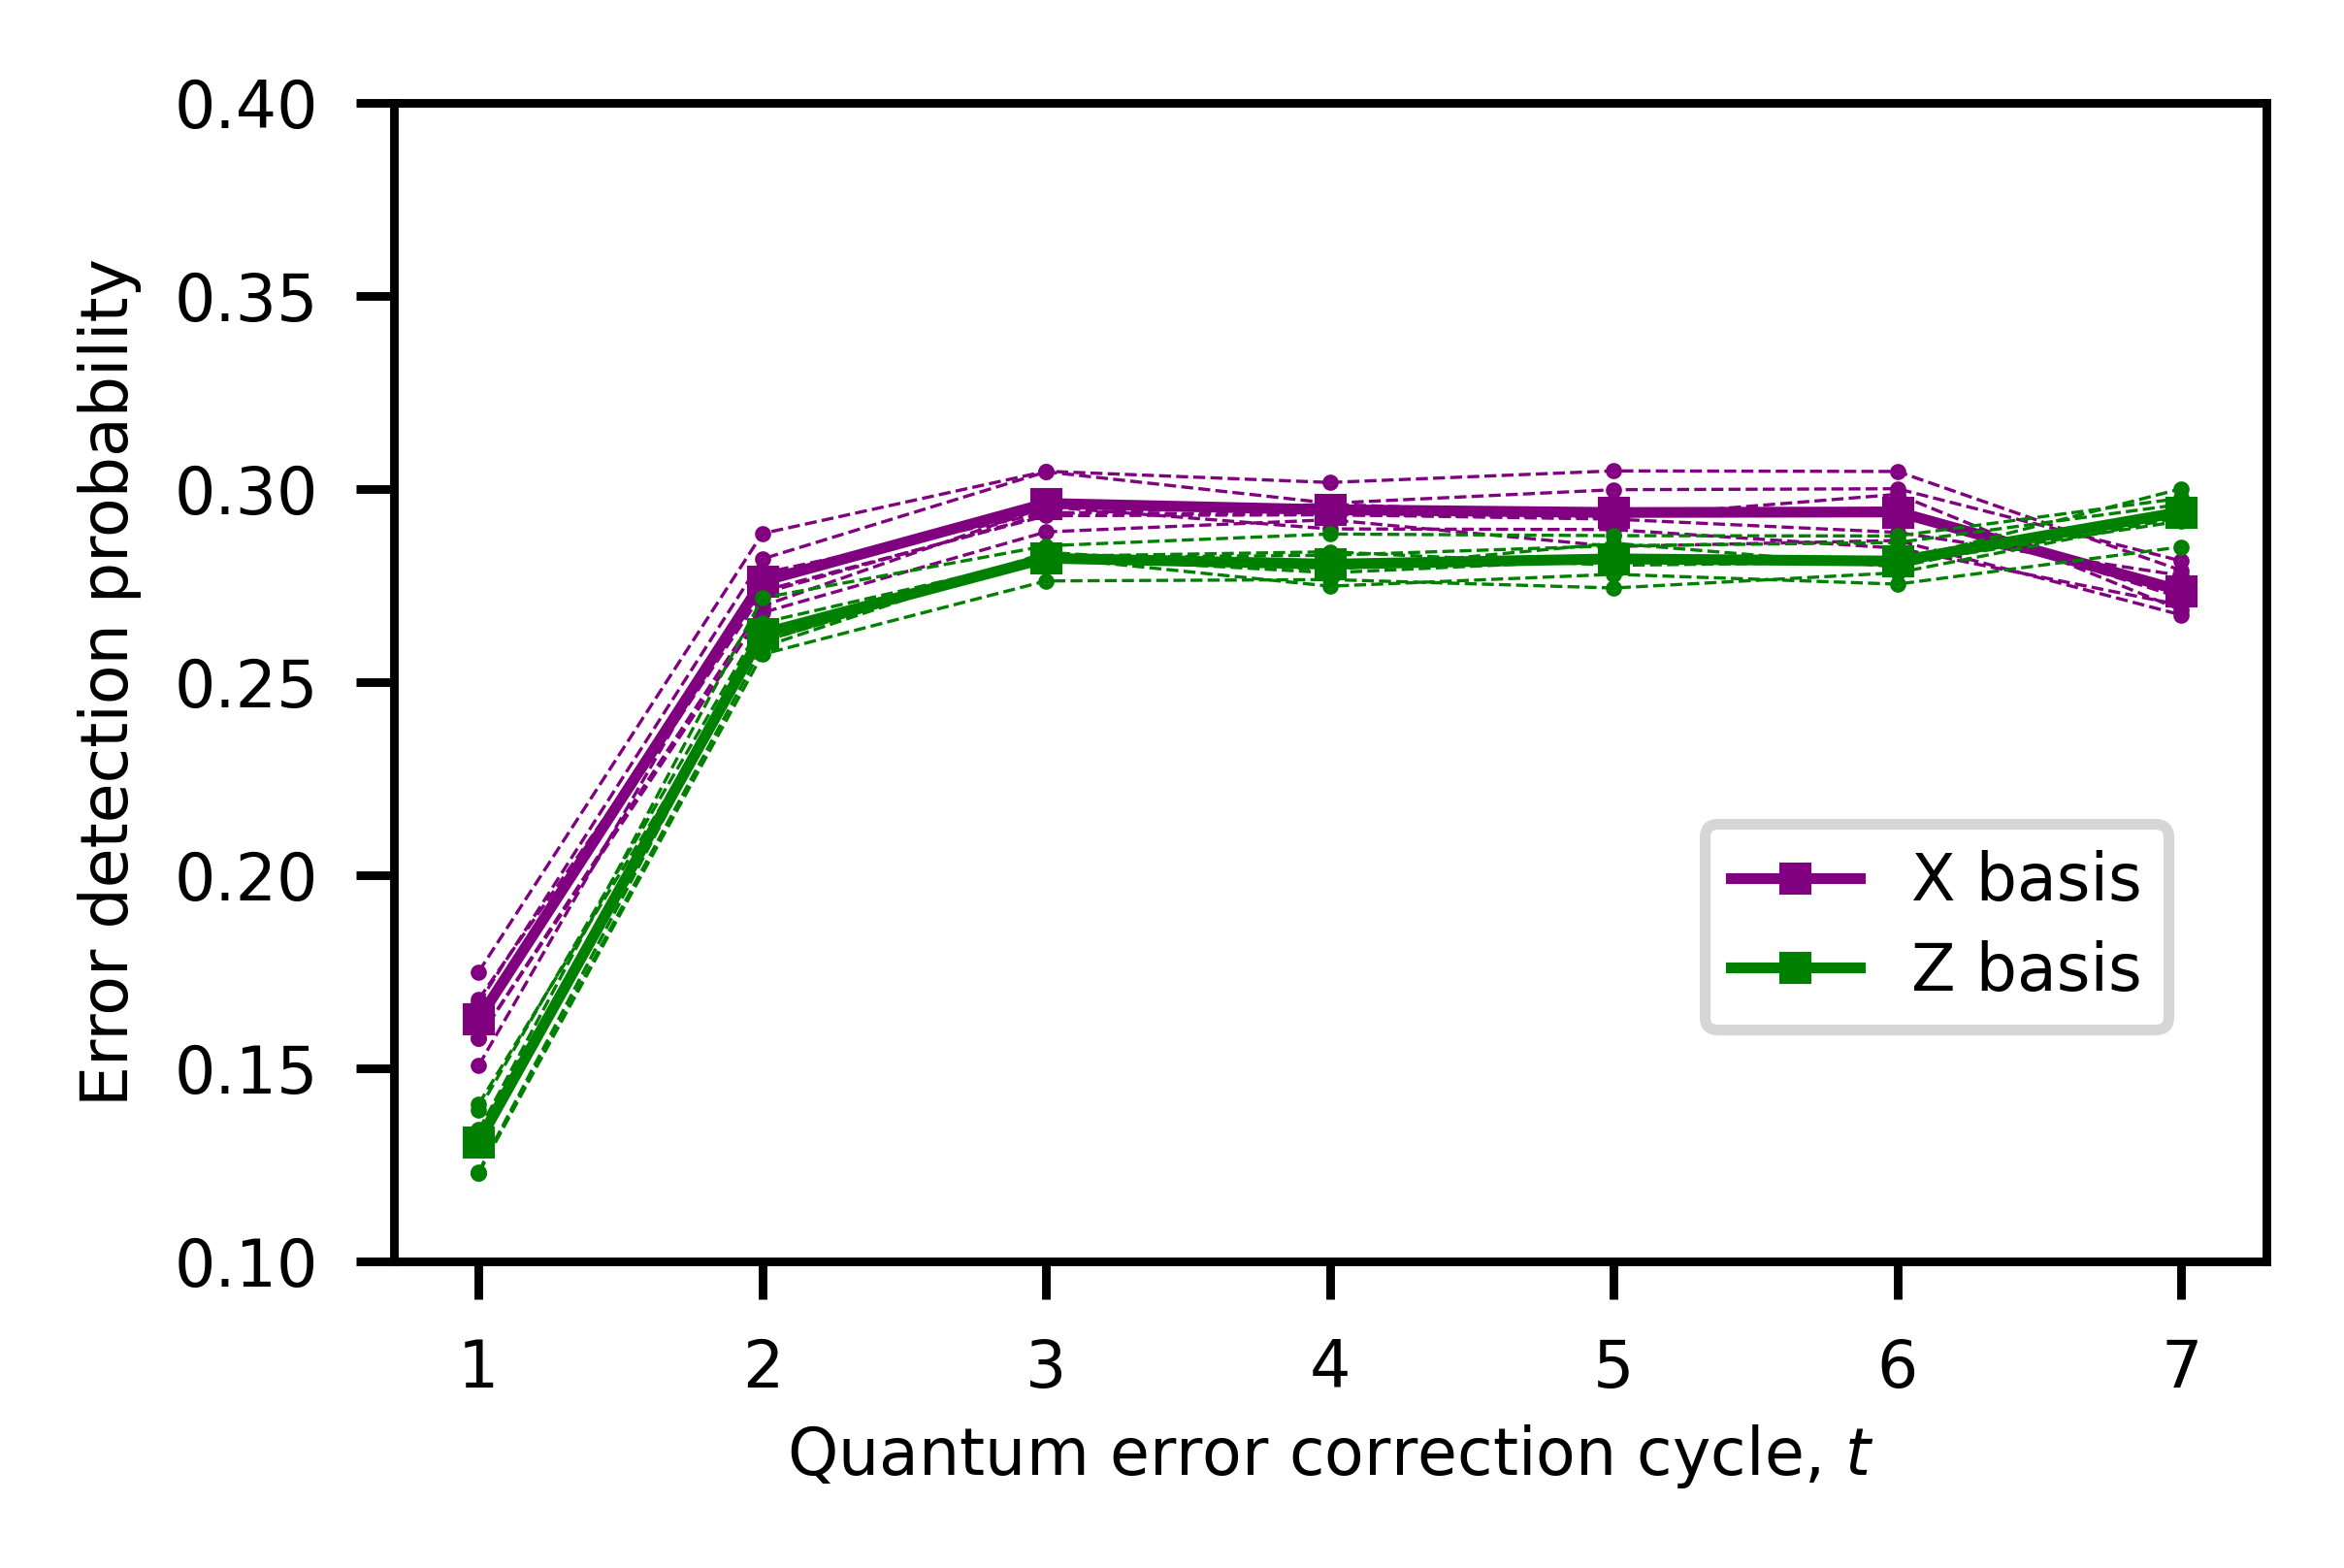

In [14]:
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams['figure.figsize'] = 3, 2
plt.rcParams.update({'font.size': 6})

fig, ax = plt.subplots( dpi = 800)

ax.plot( range(1, max_num_cycles+2), mean_detect_prob_cycle_x, color = 'purple', linestyle = "-", linewidth=1, 
        marker = 's', markersize = 2, label = "X basis" )

for i in range( num_xcheck ):
    ax.plot( range(1, max_num_cycles+2), per_x_detect_prob[i], color = 'purple', linestyle = "--", linewidth=0.3, 
        marker = '.', markersize = 1)

ax.plot( range(1, max_num_cycles+2), mean_detect_prob_cycle_z, color = 'green', linestyle = "-", linewidth=1, 
        marker = 's', markersize = 2, label = "Z basis" )

for i in range( num_zcheck ):
    ax.plot( range(1, max_num_cycles+2), per_z_detect_prob[i], color = 'green', linestyle = "--", linewidth=0.3, 
        marker = '.', markersize = 1)

ax.legend(frameon=True, loc=(0.7, 0.2), labelspacing=0.4, fontsize='6')
ax.set_xlabel(r'Quantum error correction cycle, $t$', labelpad = 2) 
ax.set_ylabel(f'Error detection probability', labelpad = 3) 
ax.set_ylim(0.1,0.4) 

plt.tight_layout()
# plt.subplots_adjust(left = 0.145, bottom = 0.18, top = 0.99, right = 0.99) 
plt.show()
fig.savefig('Simulation_Figures/Detection_prob_18_4_4_simulation.pdf', format='pdf', bbox_inches='tight', facecolor='None')

## Logical-state preservation and error per cycle

In [15]:
def four_to_one(p, k):
    return 1-(1-p)**(1/k)

def physical_p_per_cycle(cycle_time, T):
    return (1-np.exp(-cycle_time/T))/2

T1 = 40 #us
T2 = 20 #us
cycle_time = 1.785 #us

In [16]:
# accumulated error rate for four physical qubits
# physical Z state (four qubits)
cycle_t_physical = np.linspace(1, max_num_cycles+1) ;
physical_error_single_qubit_z = [physical_p_per_cycle(cycle_time*t, T1) for t in cycle_t_physical]
physical_error_four_qubits_z =  [ 1 - (1 - item)**k for item in physical_error_single_qubit_z ]  ;

physical_error_single_qubit_x = [physical_p_per_cycle(cycle_time*t, T2) for t in cycle_t_physical]
physical_error_four_qubits_x =  [ 1 - (1 - item)**k for item in physical_error_single_qubit_x ]  ;

## logical Z state

Define the logical fidelity for four distance-$4$ logical qubits : $F(t) = 1- P_L(t)$, then we have $F(t+1) = (1 - p_L) \cdot F(t)$, where $p_L$ is the logical error per cycle.

We fit $F(t) = B \cdot A^{t}$, where $A = 1 - p_L$.

We start the fit from cycle $3$.

In [17]:
cycle_t_logical = np.arange(1, max_num_cycles+1) ;
Z_logical_Fidelity = 1 - np.array( Z_logical_error_probability[0:] )
log_Z_logical_Fidelity = np.log(Z_logical_Fidelity)


sigma_Z_logical_error = [ np.sqrt(item*(1-item)/num_instances) for item in Z_logical_error_probability[0:] ];
sigma_log_Z_logical_Fidelity = [ item/(1-item) for item in sigma_Z_logical_error ] ;
w0 = 1/np.array(sigma_log_Z_logical_Fidelity)**2

coefficients, cov = np.polyfit(cycle_t_logical, log_Z_logical_Fidelity, 1, w=w0, cov=True)
log_A, log_B = coefficients  # [斜率, 截距]


sigma_log_A = np.sqrt(cov[0,0]) ;
sigma_pL = np.exp(log_A) * sigma_log_A ;  #  


# 转换回原始参数
A = np.exp(log_A)
B = np.exp(log_B)

Logical_error_four_qubits_per_cycle_Z = 1 - A
print(f"Logical error rate for four logical qubits per cycle = {Logical_error_four_qubits_per_cycle_Z} ± {sigma_pL}")

Logical_error_single_qubit_per_cycle_Z = 1-A**(1/k)
print(f"Logical error rate for a single logical qubit per cycle = {Logical_error_single_qubit_per_cycle_Z}")

Logical_T1 = -cycle_time/np.log(1 - 2 * Logical_error_single_qubit_per_cycle_Z)
print(f"Logical T_1 for four logical qubits per cycle = {Logical_T1}")

Logical error rate for four logical qubits per cycle = 0.21294746207420268 ± 0.0011912937700998883
Logical error rate for a single logical qubit per cycle = 0.05810838451335221
Logical T_1 for four logical qubits per cycle = 14.448356849111033


In [18]:
# The fit line
cycle_interpo = np.linspace(1, max_num_cycles+1, 100) ;
pred_Z_logical_error_probability = (1 - B * A**(cycle_interpo))

In [19]:
# Z_logical_error_probability

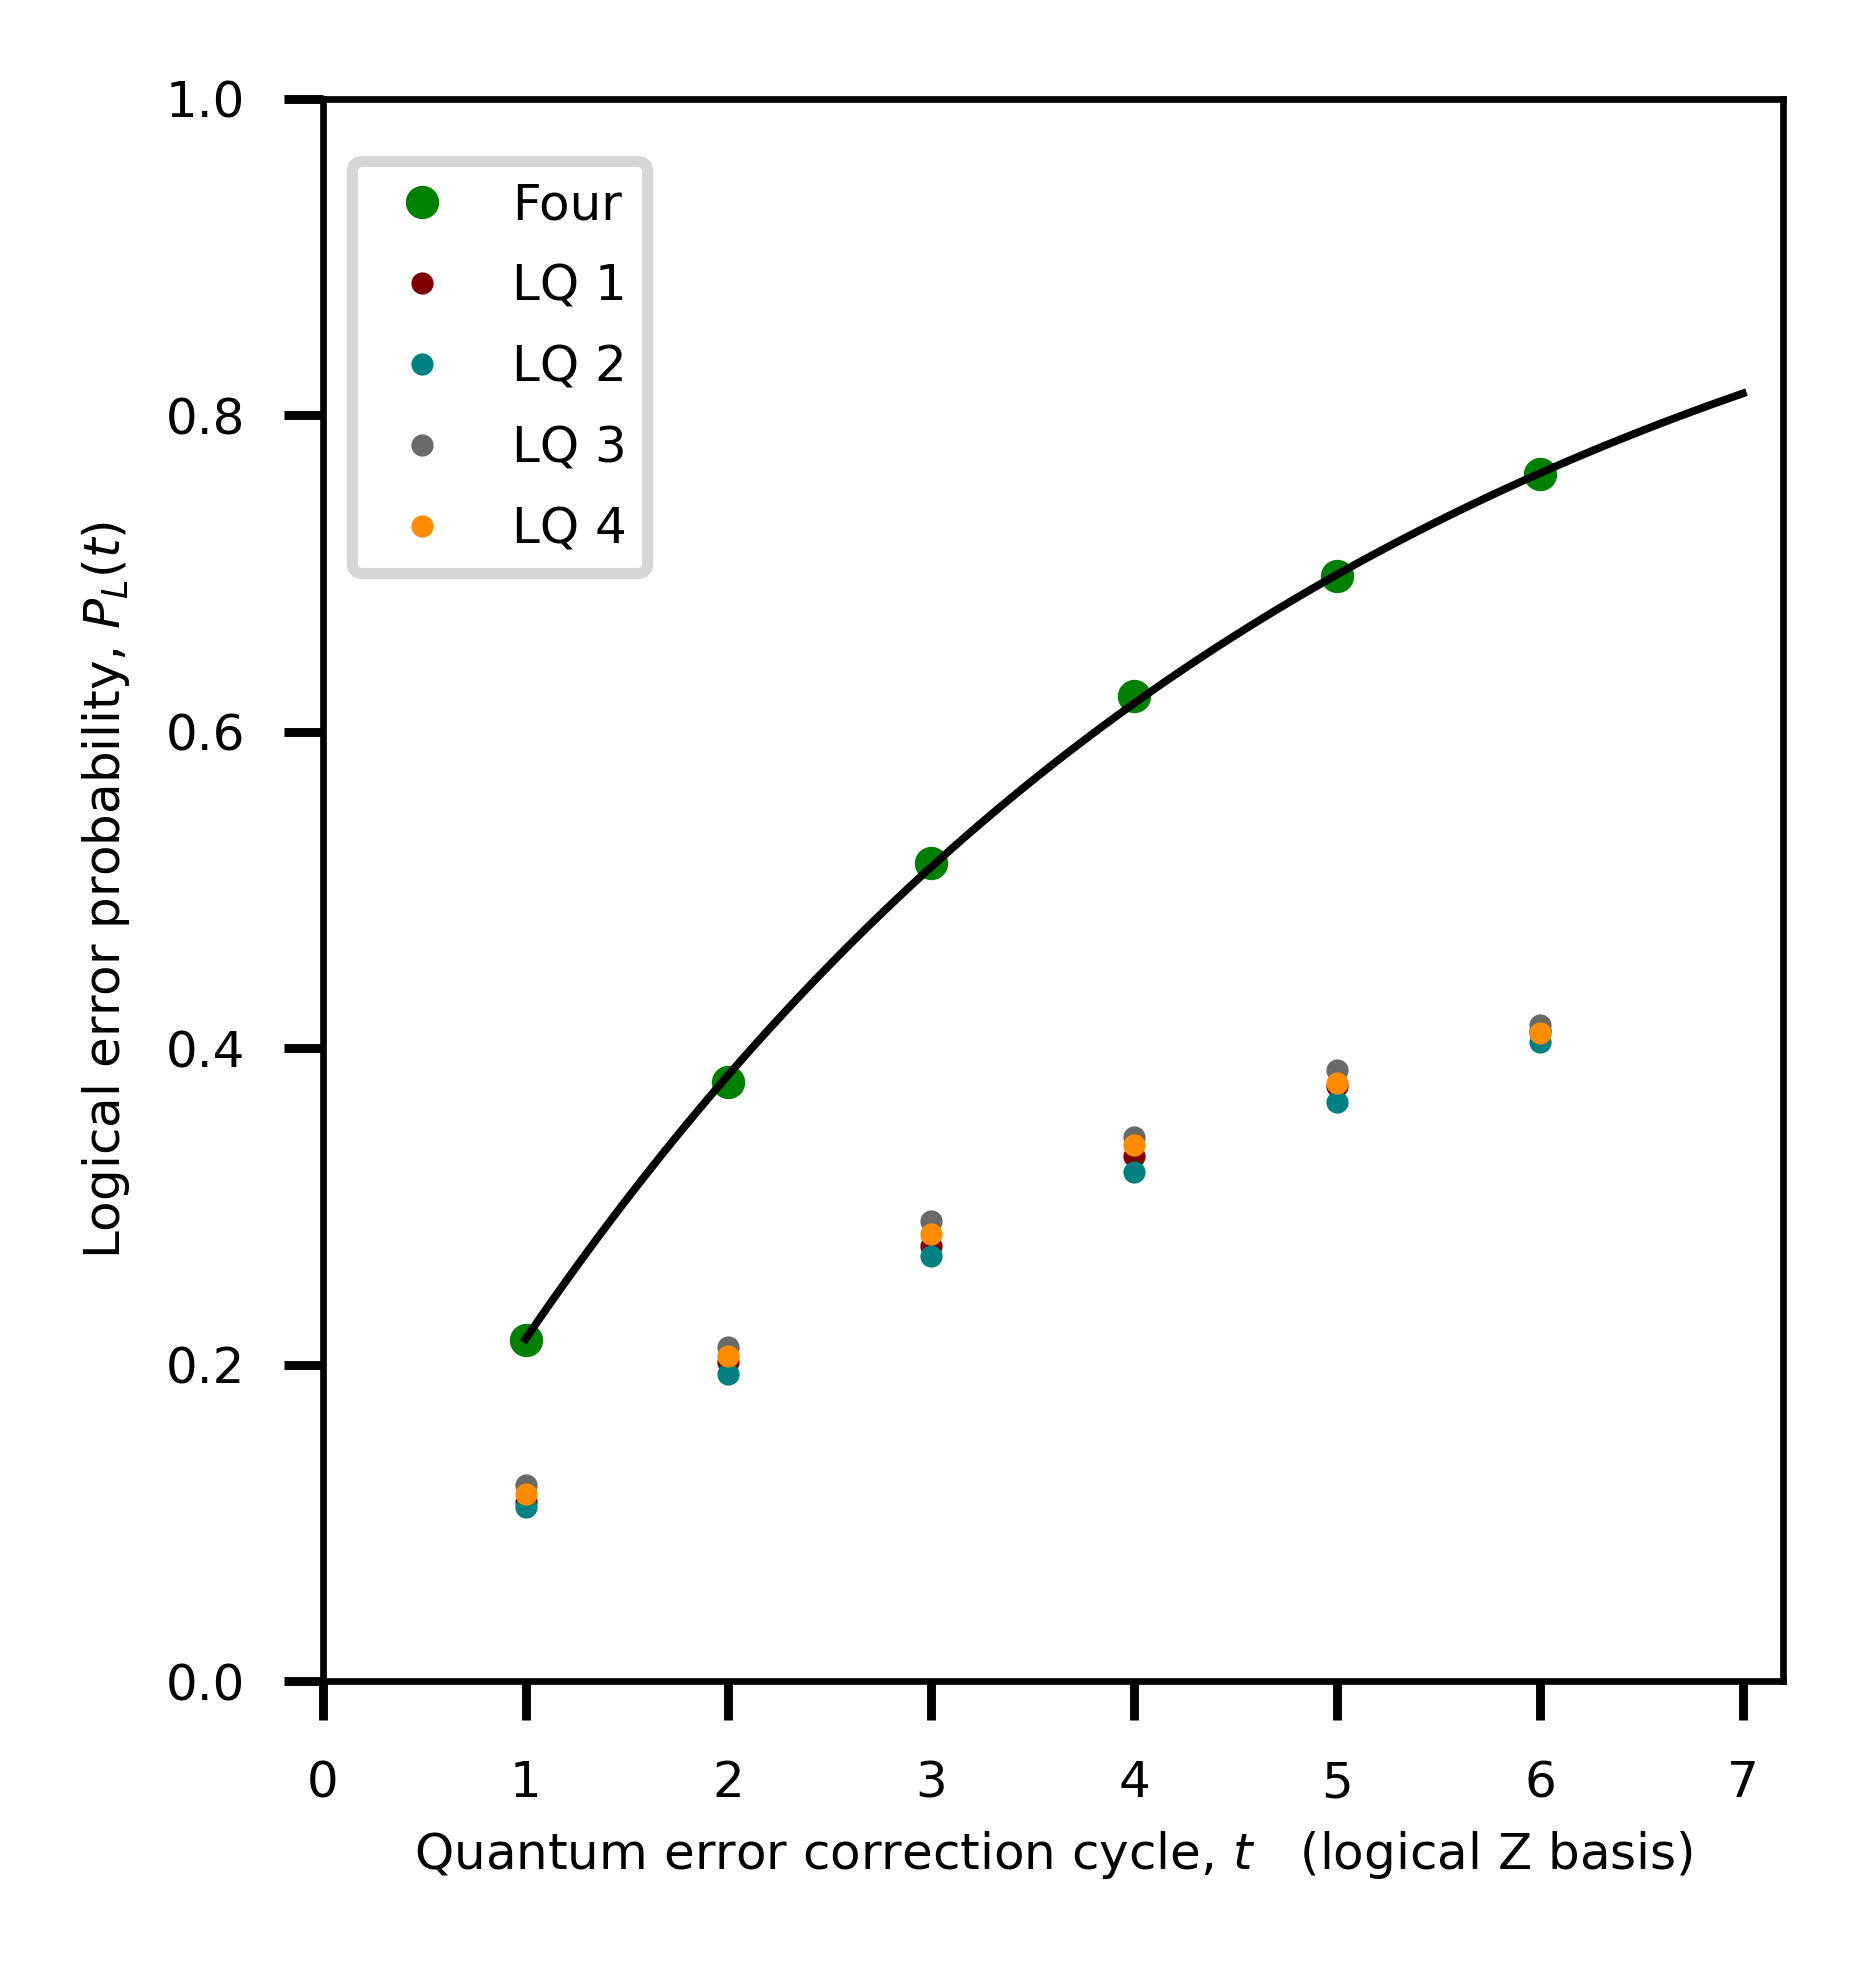

In [20]:
# color_list = ["Auqamarin", "PaleGodenrod", "LightPink", "LightBLue", "Thistle", "Chocolate"] ;
color_list = ["maroon", "teal", "dimGray", "#FF8C00", "#BC8F8F", "#7FFFAA"]
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams['figure.figsize'] = 2.2, 2.3
plt.rcParams.update({'font.size': 4.5})

fig, ax = plt.subplots( dpi = 800)

# Z_logical_error_propability.insert(0, None)
ax.set_xlim(0, 7.2)
ax.set_ylim(0, 1)
spine_width = 0.6 ;
ax.spines['top'].set_linewidth(spine_width)    
ax.spines['bottom'].set_linewidth(spine_width) 
ax.spines['left'].set_linewidth(spine_width)   
ax.spines['right'].set_linewidth(spine_width)  


#----------------------------------------------------------------------
ax.plot( range(1, max_num_cycles+1), Z_logical_error_probability, color = 'green', linestyle = "", linewidth=1, 
        marker = '.', markersize = 4, label = 'Four' )
# ax.plot( range(1, max_num_cycles+1), four_to_one( np.array(Z_logical_error_probability), 4), color = 'plum', linestyle = "", linewidth=1.2, 
#         marker = '.', markersize = 6, label = 'estimated single logical qubit' )
#----------------------------------------------------------------------
for i in range(k):
    ax.plot( range(1, max_num_cycles+1), [item[i] for item in Z_logical_error_probability_perqubit], color = color_list[i], \
            linestyle = "", linewidth=1.2, marker = '.', markersize = 2, label = f'LQ {i+1}' )
#----------------------------------------------------------------------

ax.plot( cycle_interpo, pred_Z_logical_error_probability, color = 'black', linestyle = "solid", linewidth=0.7)
#----------------------------------------------------------------------
ax.legend(frameon=True, loc=(0.02, 0.7), labelspacing=0.66, fontsize='4.5')
ax.set_xlabel(r'Quantum error correction cycle, $t$   (logical Z basis)', labelpad = 2) 
ax.set_ylabel(r'Logical error probability, $P_L(t)$', labelpad = 3) 
# ax.text(5, 0.2, "Logical Z basis", fontsize=5, color='black', ha='center', va='center')

# plt.tight_layout()
plt.subplots_adjust(left = 0.15, bottom = 0.12, top = 0.98, right = 0.98) 
plt.show()
fig.savefig('Simulation_Figures/Z_error_correction_18_4_4_simulation.pdf', format='pdf', facecolor='None')

## logical X state

In [ ]:
cycle_t_logical = np.arange(1, max_num_cycles+1) ;
X_logical_Fidelity = 1 - np.array( X_logical_error_probability[0:] )
log_X_logical_Fidelity = np.log(X_logical_Fidelity)

sigma_X_logical_error = [ np.sqrt(item*(1-item)/num_instances) for item in X_logical_error_probability[0:] ];
sigma_log_X_logical_Fidelity = [ item/(1-item) for item in sigma_X_logical_error ] ;
w0 = 1/np.array(sigma_log_X_logical_Fidelity)**2

coefficients, cov = np.polyfit(cycle_t_logical, log_X_logical_Fidelity, 1, w=w0, cov=True)
log_A2, log_B2 = coefficients  # [斜率, 截距]

sigma_log_A2 = np.sqrt(cov[0,0]) ;
sigma_pL = np.exp(log_A2) * sigma_log_A2 ;  #  


# 转换回原始参数
A2 = np.exp(log_A2)
B2 = np.exp(log_B2)

Logical_error_four_qubits_per_cycle_X = 1 - A2
print(f"Logical error rate for four logical qubits per cycle = {Logical_error_four_qubits_per_cycle_X} ± {sigma_pL}")

Logical_error_single_qubit_per_cycle_X = 1 - A2**(1/k)
print(f"Logical error rate for a single logical qubit per cycle = {Logical_error_single_qubit_per_cycle_X}")

Logical_T2 = -cycle_time/np.log(1 - 2 * Logical_error_single_qubit_per_cycle_X)
print(f"Logical T_2 for four logical qubits per cycle = {Logical_T2}")

In [ ]:
sigma_log_A2

In [ ]:
# The fit line
cycle_interpo = np.linspace(1, max_num_cycles+1, 100) ;
pred_X_logical_error_probability = (1 - B2 * A2**(cycle_interpo))

In [ ]:
color_list = ["cyan", "grey", "blue", "red"] ;
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams['figure.figsize'] = 2.2, 2.3
plt.rcParams.update({'font.size': 4.5})

fig, ax = plt.subplots( dpi = 800)
ax.set_xlim(0, 7.2)
ax.set_ylim(0, 1)
spine_width = 0.6 ;
ax.spines['top'].set_linewidth(spine_width)    
ax.spines['bottom'].set_linewidth(spine_width) 
ax.spines['left'].set_linewidth(spine_width)   
ax.spines['right'].set_linewidth(spine_width)  

ax.plot( cycle_t_logical, X_logical_error_probability, color = 'purple', linestyle = "", linewidth=1, 
        marker = 'o', markerfacecolor='none', markeredgewidth=0.8, markersize = 3, label = 'Four' )
# ax.plot( range(1, max_num_cycles+1), four_to_one( np.array(X_logical_error_probability), 4), color = 'plum', linestyle = "", linewidth=1.2, 
#         marker = '.', markersize = 6, label = 'estimated single logical qubit' )
#----------------------------------------------------------------------
for i in range(k):
    ax.plot( range(1, max_num_cycles+1), [item[i] for item in X_logical_error_probability_perqubit], color = color_list[i], \
            linestyle = "", linewidth=1.2, marker = 'o', markerfacecolor='none', markeredgewidth=0.4, markersize = 2, label = f'LQ {i+1}' )
#----------------------------------------------------------------------

ax.plot( cycle_interpo, pred_X_logical_error_probability, color = 'black', linestyle = "solid", linewidth=0.7)

ax.legend(frameon=True, loc=(0.02, 0.72), labelspacing=0.66, fontsize='4.5')
ax.set_xlabel(r'QEC cycle, $t$   (logical X basis)', labelpad = 2) 
ax.set_ylabel(r'Logical error probability, $P_L(t)$', labelpad = 3) 


plt.subplots_adjust(left = 0.15, bottom = 0.12, top = 0.98, right = 0.98) 

plt.show()
fig.savefig('Simulation_Figures/X_error_correction_18_4_4_simulation.pdf', format='pdf', facecolor='None')